# Load the data

In [3]:
import os

data_dir = os.path.join('..', 'data', 'pyconuk2016')

talk_types = ['keynotes', 'workshops', 'talks']

all_talk_files = [os.path.join(data_dir, talk_type, fname)
                  for talk_type in talk_types
                  for fname in os.listdir(os.path.join(data_dir, talk_type))]

documents = {}
for talk_fname in all_talk_files:
    bname = os.path.basename(talk_fname)
    talk_title = os.path.splitext(bname)[0]
    with open(talk_fname, 'r',encoding='utf-8') as f:
        content = f.read()
        documents[talk_title] = content
        
corpus_all_in_one = ' '.join([doc for doc in documents.values()])
        
print("Number of talks: {}".format(len(all_talk_files)))
print("Corpus size (char): {}".format(len(corpus_all_in_one)))

Number of talks: 101
Corpus size (char): 78067


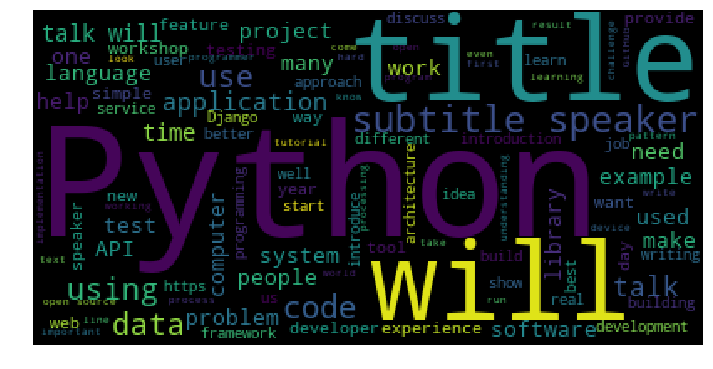

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_words=100)
cloud.generate_from_text(corpus_all_in_one)

plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [7]:
all_talk_files[0]

'..\\data\\pyconuk2016\\keynotes\\folklore-and-fantasy-in-the-information-age.md'

In [14]:
documents = {}
for talk_fname in all_talk_files:
    bname = os.path.basename(talk_fname)
    talk_title = os.path.splitext(bname)[0]
    with open(talk_fname,'r',encoding = 'utf-8') as f:
        content = ''
        for line in f:
            if line.startswith('title:'):
                line = line[6:]
            if line.startswith('subtitle') or line.startswith('speaker:') or line.startswith('---'):
                continue
            content +=line
        documents[talk_title] = content
        
corpus_all_in_one = ' '.join([doc for doc in documents.values()])

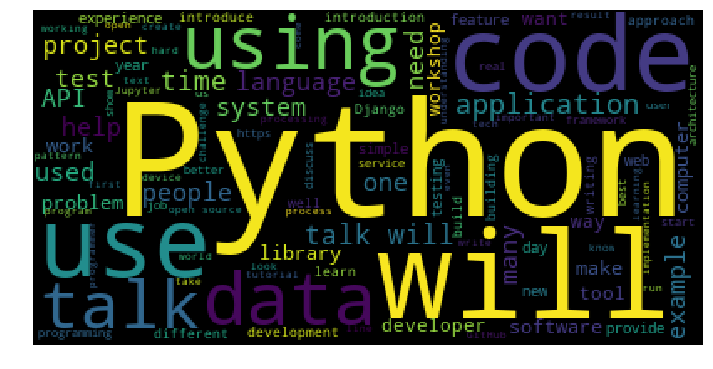

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_words=100)
cloud.generate_from_text(corpus_all_in_one)

plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [20]:
from collections import Counter
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_list = stopwords.words('english') + list(string.punctuation)

document_frequency = Counter()

for talk_id, content in documents.items():
    try:
        tokens = word_tokenize(content)
    except UnicodeDecodeError:
        tokens = word_tokenize(content.decode('utf-8'))
    unique_tokens = [token.lower() for token in set(tokens) if token.lower() not in stop_list]
    document_frequency.update(unique_tokens)
    
for word,freq in document_frequency.most_common(20):
    print("{}\t{}".format(word,freq))

python	63
talk	59
code	37
using	36
use	33
's	31
data	28
used	21
'll	21
also	19
help	19
many	19
one	19
learning	18
development	18
time	18
language	18
''	17
make	16
get	16


In [22]:
for item in ['will','ll','gl']:
    print("{} in stop_list == {}".format(item,item in stop_list))

will in stop_list == True
ll in stop_list == True
gl in stop_list == False


In [24]:
from nltk import ngrams

try:
    all_tokens = [t for t in word_tokenize(corpus_all_in_one)]
except UnicodeDecodeError:
    all_tokens = [t for t in word_tokenize(corpus_all_in_one.decode('utf-8'))]
    
bigrams = ngrams(all_tokens,2)
trigrams = ngrams(all_tokens,3)

bi_count = Counter(bigrams)
tri_count = Counter(trigrams)

for phrase,freq in bi_count.most_common(20):
    print("{}\t{}".format(phrase,freq))

for phrase,freq in tri_count.most_common(20):
    print("{}\t{}".format(phrase,freq))

(',', 'and')	82
('of', 'the')	56
('.', 'This')	41
('how', 'to')	40
('is', 'a')	31
('This', 'talk')	31
('talk', 'will')	28
('.', 'We')	27
('will', 'be')	25
('.', 'It')	25
('in', 'the')	24
('.', 'In')	24
('.', 'I')	23
('and', 'how')	23
('some', 'of')	21
(',', 'the')	21
('.', 'The')	21
('can', 'be')	21
('you', 'can')	20
('In', 'this')	20
('.', 'This', 'talk')	21
('This', 'talk', 'will')	21
('.', 'In', 'this')	16
('some', 'of', 'the')	15
('.', 'We', "'ll")	12
('(', 'https', ':')	11
('In', 'this', 'talk')	11
('as', 'well', 'as')	9
(']', '(', 'https')	9
('how', 'you', 'can')	8
('and', 'how', 'to')	8
('this', 'talk', ',')	8
('?', 'This', 'talk')	8
('.', 'I', 'will')	7
(',', 'and', 'how')	6
('one', 'of', 'the')	6
('.', 'We', 'will')	6
('to', 'build', 'a')	5
('AWS', 'Elastic', 'Beanstalk')	5
(',', 'we', "'ll")	5
